In [26]:
import pandas as pd
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def add_persents(df):
    df['<OPEN%>'] = df_5['<OPEN>'].pct_change()*100
    df['<CLOSE%>'] = df_5['<CLOSE>'].pct_change()*100
    df['<LOW%>'] = df_5['<LOW>'].pct_change()*100
    df['<HIGH%>'] = df_5['<HIGH>'].pct_change()*100
    return df

def sampling(df):
    pass

In [3]:
df_ticks = pd.read_csv('data/SPFB.RTS_170904_170905_tiki.csv')

In [6]:
df_ticks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349246 entries, 0 to 349245
Data columns (total 6 columns):
<TICKER>    349246 non-null object
<PER>       349246 non-null int64
<DATE>      349246 non-null int64
<TIME>      349246 non-null int64
<LAST>      349246 non-null float64
<VOL>       349246 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 16.0+ MB


In [7]:
df_ticks.head(2)

<TICKER>  <PER>    <DATE>  <TIME>    <LAST>  <VOL>
0  SPFB.RTS      0  20170904  100000  110330.0      2
1  SPFB.RTS      0  20170904  100000  110330.0      1

In [8]:
df_ticks.describe()

<PER>        <DATE>         <TIME>         <LAST>          <VOL>
count  349246.0  3.492460e+05  349246.000000  349246.000000  349246.000000
mean        0.0  2.017090e+07  148344.726013  109394.785366       2.294308
std         0.0  4.991458e-01   31263.492489     391.137682       5.295250
min         0.0  2.017090e+07  100000.000000  108670.000000       1.000000
25%         0.0  2.017090e+07  121420.000000  109120.000000       1.000000
50%         0.0  2.017090e+07  153000.000000  109350.000000       1.000000
75%         0.0  2.017090e+07  171953.000000  109640.000000       2.000000
max         0.0  2.017090e+07  234959.000000  110400.000000     916.000000

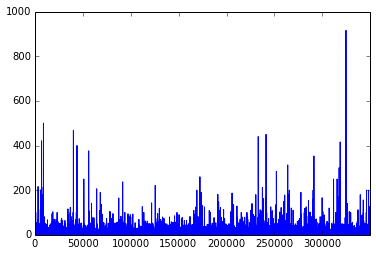

In [9]:
df_ticks['<VOL>'].plot()

In [3]:
df_5 = pd.read_csv('data/SPFB.RTS_170101_170905_5m.csv')

In [4]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28162 entries, 0 to 28161
Data columns (total 9 columns):
<TICKER>    28162 non-null object
<PER>       28162 non-null int64
<DATE>      28162 non-null int64
<TIME>      28162 non-null int64
<OPEN>      28162 non-null float64
<HIGH>      28162 non-null float64
<LOW>       28162 non-null float64
<CLOSE>     28162 non-null float64
<VOL>       28162 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.9+ MB


In [5]:
df_5 = add_persents(df_5)

In [8]:
df_5.describe()

/usr/local/lib/python3.4/dist-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


<PER>        <DATE>         <TIME>         <OPEN>         <HIGH>  \
count  28162.0  2.816200e+04   28162.000000   28162.000000   28162.000000   
mean       5.0  2.017048e+07  167676.496698  108126.776507  108194.884951   
std        0.0  2.362371e+02   39877.942202    6153.734379    6157.140788   
min        5.0  2.017010e+07  100500.000000   93630.000000   93720.000000   
25%        5.0  2.017030e+07  133000.000000  103170.000000  103230.000000   
50%        5.0  2.017050e+07  165500.000000  108360.000000  108430.000000   
75%        5.0  2.017071e+07  202500.000000  112637.500000  112730.000000   
max        5.0  2.017090e+07  235000.000000  119860.000000  120200.000000   

               <LOW>        <CLOSE>         <VOL>       <OPEN%>      <CLOSE%>  \
count   28162.000000   28162.000000  28162.000000  28161.000000  28161.000000   
mean   108057.930190  108126.544280   3330.341062     -0.000116     -0.000149   
std      6150.605731    6153.598606   3314.079908      0.095121      0.093271   
min     93550.000000   93640.000000      0.000000     -1.629291     -1.737063   
25%    103110.000000  103170.000000   1038.000000           NaN           NaN   
50%    108300.000000  108360.000000   2449.000000           NaN           NaN   
75%    112550.000000  112637.500000   4525.000000           NaN           NaN   
max    119850.000000  119850.000000  50803.000000      1.799909      1.911993   

             <LOW%>       <HIGH%>  
count  28161.000000  28161.000000  
mean      -0.000122     -0.000152  
std        0.089778      0.088906  
min       -2.480322     -1.354691  
25%             NaN           NaN  
50%             NaN           NaN  
75%             NaN           NaN  
max        1.653723      1.918684

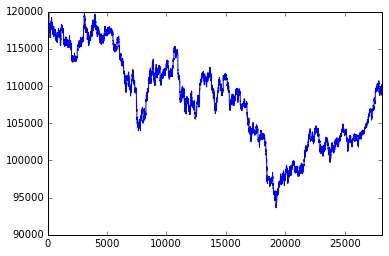

In [9]:
df_5['<OPEN>'].plot()

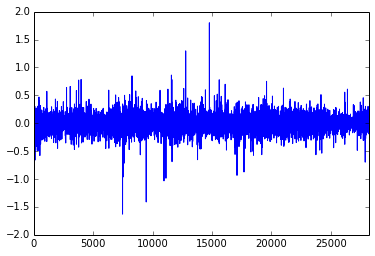

In [48]:
df_5['<OPEN%>'].plot()

In [46]:
df_5[4:7]

<TICKER>  <PER>    <DATE>  <TIME>    <OPEN>    <HIGH>     <LOW>   <CLOSE>  \
4  SPFB.RTS      5  20170103  102500  116550.0  116600.0  116300.0  116380.0   
5  SPFB.RTS      5  20170103  103000  116370.0  116470.0  116340.0  116400.0   
6  SPFB.RTS      5  20170103  103500  116410.0  116580.0  116350.0  116550.0   

   <VOL>   <OPEN%>  <CLOSE%>    <LOW%>   <HIGH%>  
4   5367  0.060096 -0.145860 -0.128811 -0.034294  
5   3275 -0.154440  0.017185  0.034394 -0.111492  
6   3392  0.034373  0.128866  0.008595  0.094445

In [6]:
df_5[df_5['<DATE>'] == 20170703].shape

(166, 13)

In [16]:
df_5.shape

(28162, 13)

In [7]:
df_5.iloc[100][['<OPEN%>', '<CLOSE%>', '<LOW%>', '<HIGH%>']].values.tolist()

[-0.016709833737149626,
 -0.083556149732622043,
 -0.033444816053507243,
 -0.033386194808449066]

In [10]:
def split_data(df, x_n, y_n, columns=None):
    if columns is None:
        columns = ('<OPEN%>', '<CLOSE%>', '<LOW%>', '<HIGH%>')
    row, next_row = [[], []], [[], []]
    X, y = [],[]
    _x = 0
    _y = 0
    
    # first_row - Nan
    is_first_row = True
    for i, _row in df.iterrows():
        # skip row of NaN
        if is_first_row:
            is_first_row = False
            continue
        cell = [_row[column] for column in columns]    
        if _x < x_n:
            row[0].append(cell)
            _x += 1
        elif _x >= x_n and _y < y_n:
            # строки идут внахлест, поэтому мы сохраняем y текущей строки и X новой
            row[1].append(cell)
            next_row[0].append(cell)
            _y += 1
        else:
            X.append(row[0])
            y.append(row[1])
            row = next_row
            next_row = [[], []]
            _x = _y  # потому что внахлест!!!
            _y = 0
    return X, y

In [8]:
def split_data_v2(df, x_n, y_n, columns=None):
    CLOSE = '<CLOSE%>'
    if columns is None:
        columns = ('<OPEN%>', '<CLOSE%>', '<LOW%>', '<HIGH%>')
    row, next_row = [[], []], [[], []]
    X, y = [],[]
    _x = 0
    _y = 0
    
    # first_row - Nan
    is_first_row = True
    for i, _row in df.iterrows():
        # skip row of NaN
        if is_first_row:
            is_first_row = False
            continue
        cell = [_row[column] for column in columns]    
        if _x < x_n:
            row[0].append(cell)
            _x += 1
        elif _x >= x_n and _y < y_n:
            # строки идут внахлест, поэтому мы сохраняем y текущей строки и X новой
            row[1].append(_row[CLOSE])
            next_row[0].append(cell)
            _y += 1
        else:
            X.append(row[0])
            y.append(row[1])
            row = next_row
            next_row = [[], []]
            _x = _y  # потому что внахлест!!!
            _y = 0
    return X, y

# Попробую поработать с окнами 48->12 (4 часа и 1 час)

In [14]:
sX2, sy2 = split_data_v2(df_5.sort_values(by=['<DATE>', '<TIME>']), 48, 12)

In [15]:
nsX2, nsy2 = np.array(sX2), np.array(sy2)

In [16]:
nsX2.shape

(574, 48, 4)

In [93]:
2815*0.01/256

0.10996093750000001

In [40]:
X_train, X_test, y_train, y_test = train_test_split(nsX2, nsy2, test_size=0.11, shuffle=False, stratify=None)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((510, 48, 4), (64, 48, 4), (510, 12), (64, 12))

In [19]:
def iter_batch(X, y, batch_size):
    for i in range(int(X.shape[0]/batch_size)):
        start = i*batch_size
        end = i*batch_size + batch_size
        yield X[start:end], y[start:end]

# start simple rnn

In [17]:
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell

In [28]:
def train_neural_network(sess, x, y, y_out, data_x, data_y):
    for epoch in range(hm_epochs):
        start_epoch = time.time()
        epoch_loss = 0
        for (epoch_x, epoch_y) in iter_batch(data_x, data_y, batch_size):
            _, c = sess.run([optimizer, loss], feed_dict={x: [epoch_x], y: [epoch_y]})
            epoch_loss += c
        print('Epoch', epoch, 'get time', int(time.time() - start_epoch), 'completed out of',hm_epochs,'loss:',epoch_loss)

# v1 only rnn

In [24]:
tf.reset_default_graph()

hm_epochs = 100
batch_size = 128
chunk_size = 28
n_chunks = 28
rnn_size = 1024

n_in_cell = 4
n_in_X = 48
n_in_y = 12
CLOSE_TARGET = 1

x = tf.placeholder('float', [None, batch_size, n_in_X, n_in_cell])
y = tf.placeholder('float', [None, batch_size, n_in_y])
is_training = tf.placeholder(tf.bool)

def rnn_v1(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size, n_in_y])),
             'biases':tf.Variable(tf.random_normal([n_in_y]))}
    
    print(1, x.get_shape())
    
#     x = tf.transpose(x, [1, 0, 2])
#     print(2, x.get_shape())
    
    x = tf.reshape(x, [-1, batch_size, n_in_cell*n_in_X])
    print('reshape_1', x.get_shape())
    
#     x = tf.split(x, n_chunks, 0)
#     print(4, len(x), x[0].get_shape(),)
    
    lstm_cell = tf.contrib.rnn.LSTMBlockCell(rnn_size)
    outputs, states = tf.nn.dynamic_rnn(cell=lstm_cell, 
                                        inputs=x, 
                                        dtype=tf.float32, #sequence_length= 
    )
    # lstm_cell = rnn_cell.BasicLSTMCell(rnn_size)
    # outputs, states = tf.nn.static_rnn(lstm_cell, x, dtype=tf.float32) 
        
    print('out_rnn_1', outputs[-1].get_shape())    
        
    output = tf.matmul(outputs[-1], layer['weights']) + layer['biases']
    print('final_output', output.get_shape())
    return output

y_out = rnn_v1(x)
squared_deltas = tf.square((y_out - y)**2)
loss = tf.reduce_mean(squared_deltas)
optimizer = tf.train.AdamOptimizer().minimize(loss)

1 (?, 128, 48, 4)
reshape_1 (?, 128, 192)
out_rnn_1 (128, 1024)
final_output (128, 12)


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_neural_network(sess, x, y, y_out, X_train, y_train)
y_predict = sess.run(y_out, feed_dict={x: [X_test[:128]]})
print(np.sum((y_predict - y_test[:128])**2, axis=0))
y_predict = sess.run(y_out, feed_dict={x: [X_test[128:256]]})
print(np.sum((y_predict - y_test[128:256])**2, axis=0))

Epoch 0 completed out of 100 loss: 1.43794307113
Epoch 1 completed out of 100 loss: 11.3467080593
Epoch 2 completed out of 100 loss: 3.66489005089
Epoch 3 completed out of 100 loss: 0.478748992085
Epoch 4 completed out of 100 loss: 0.311678685248
Epoch 5 completed out of 100 loss: 0.467780433595
Epoch 6 completed out of 100 loss: 0.314840663224
Epoch 7 completed out of 100 loss: 0.27620530501
Epoch 8 completed out of 100 loss: 0.190578343347
Epoch 9 completed out of 100 loss: 0.123668801039
Epoch 10 completed out of 100 loss: 0.0901013556868
Epoch 11 completed out of 100 loss: 0.0723466482013
Epoch 12 completed out of 100 loss: 0.0597967207432
Epoch 13 completed out of 100 loss: 0.0490441517904
Epoch 14 completed out of 100 loss: 0.0401170365512
Epoch 15 completed out of 100 loss: 0.0333531871438
Epoch 16 completed out of 100 loss: 0.0283743920736
Epoch 17 completed out of 100 loss: 0.0245792926289
Epoch 18 completed out of 100 loss: 0.0215590060689
Epoch 19 completed out of 100 loss: 

In [42]:
arr = np.repeat(X_test, 2)

In [49]:
X_test[0]

array([[ 0.05795422, -0.08687259, -0.04831385, -0.01929571],
       [-0.07722753, -0.08694812, -0.03866976, -0.05789829],
       [-0.09660902, -0.08702379, -0.08704062, -0.13517428],
       [-0.0870322 , -0.02903319, -0.02903882, -0.04834187],
       [-0.01935734,  0.09680542,  0.01936483,  0.04836525],
       [ 0.09680542, -0.01934236,  0.04840271,  0.01933675],
       [-0.03868472,  0.05803831,  0.        ,  0.        ],
       [ 0.07739938,  0.07733952,  0.04837929,  0.07733204],
       [ 0.07733952, -0.05795981,  0.01934236,  0.04829518],
       [ 0.10625966,  0.16431471,  0.2030555 ,  0.04827187],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.11593083, -0.05789829,  0.13537033,  0.        ],
       [-0.04824858,  0.        , -0.02896871, -0.04823927],
       [-0.00965437,  0.10620836,  0.03863614,  0.11583012],
       [ 0.09655306,  0.02893519,  0.09655306,  0.02892403],
       [ 0.03858397, -0.

In [50]:
arr_2 = np.reshape(arr, (-1, 128, 48, 4))

In [54]:
arr_2[0].shape, X_test.shape

((128, 48, 4), (64, 48, 4))

In [55]:
y_predict = sess.run(y_out, feed_dict={x: arr_2})
print(np.sum((y_predict[:64] - y_test[:64])**2, axis=0))
# y_predict = sess.run(y_out, feed_dict={x: [X_test[64:128]]})
# print(np.sum((y_predict - y_test[128:256])**2, axis=0))

[ 4.67640312  7.03800014  2.40002376  2.7116835   4.62181534  3.27007569
  3.75336208  7.86184689  2.44998432  2.86040965  1.94783651  6.13600205]


In [56]:
y_predict = y_predict[:64]

In [58]:
y_predict.shape

(64, 12)

In [61]:
j, k = 0, 0
for i in range(y_predict.shape[0]):
#     
#     if (y_predict[i] < 0).all() or (y_predict[i] > 0).all():
#         j += 1
#         if (y_test[i] < 0).all() or (y_test[i] > 0).all():
#             k += 1
        print("----------\n{}\n{}".format(y_predict[i], y_test[i]))
print(j, k)

----------
[-0.84156203 -0.4345513   0.18755573  0.63405263  0.4071618   0.65963387
 -0.65977293  0.71103597  0.38147771 -0.60367739 -0.27529424  0.4183991 ]
[ 0.14456438  0.02887114  0.02886281  0.07694527 -0.05766458 -0.02884893
  0.03847634  0.01923077  0.02884061 -0.03844306  0.02884338 -0.04805844]
----------
[-0.73458481 -0.36246455  0.242943    0.53997445  0.40248841  0.54289442
 -0.40094066  0.55717409  0.37407014 -0.51132166 -0.26999462  0.31849968]
[ 0.01930316  0.03859886  0.00964599  0.08680556 -0.01927339 -0.03855422
  0.          0.03856909 -0.03855422 -0.01928454 -0.03857653  0.01929571]
----------
[-0.37483776 -0.12202227  0.06938952  0.42134222  0.34895274  0.29344028
 -0.31415418  0.40036201  0.30083835 -0.36541721 -0.1541494   0.45164618]
[-0.09598771  0.03843198 -0.12485594 -0.00961631 -0.08655511  0.01925113
 -0.05774228 -0.20221473 -0.20262447 -0.0386735   0.06770481 -0.08699014]
----------
[-0.07745707 -0.18354142  0.07484284  0.36171412  0.39734519  0.31230313
 

# v2 add fc

In [97]:
tf.reset_default_graph()

hm_epochs = 20
batch_size = 128
chunk_size = 28
n_chunks = 28
rnn_size = 512

n_in_cell = 4
n_in_X = 9
n_in_y = 3
CLOSE_TARGET = 1

x = tf.placeholder('float', [None, batch_size, n_in_X, n_in_cell])
y = tf.placeholder('float', [None, batch_size, n_in_y])
is_training = tf.placeholder(tf.bool)

def rnn_v2(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size, n_in_y])),
             'biases':tf.Variable(tf.random_normal([n_in_y]))}
    
    print(1, x.get_shape())
    
    x = tf.reshape(x, [-1, batch_size, n_in_cell*n_in_X])
    print('reshape_1', x.get_shape())
    
    lstm_cell = tf.contrib.rnn.LSTMBlockCell(rnn_size)
    outputs, states = tf.nn.dynamic_rnn(cell=lstm_cell, 
                                        inputs=x, 
                                        dtype=tf.float32, #sequence_length= 
    )    
    print('out_rnn_1', outputs[-1].get_shape())    
    out = outputs[-1]
    
    # fc 1
    with tf.name_scope('fc_1') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = before_shape
        W = tf.get_variable("W1", shape=[before_shape, after_shape])
        b = tf.get_variable("b1", shape=[after_shape])
        out = tf.matmul(out, W) + b
        out = tf.nn.relu(out)
    
    out = tf.nn.dropout(out, 0.2)

    # fc 2
    with tf.name_scope('fc_2') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = n_in_y
        W = tf.get_variable("W2", shape=[before_shape, after_shape])
        b = tf.get_variable("b2", shape=[after_shape])
        out = tf.matmul(out, W) + b

    print('final_output', out.get_shape())
    return out

y_out = rnn_v2(x)
squared_deltas = tf.square((y_out - y)**2)
loss = tf.reduce_mean(squared_deltas)
optimizer = tf.train.AdamOptimizer().minimize(loss)

1 (?, 128, 9, 4)
reshape_1 (?, 128, 36)
out_rnn_1 (128, 512)
final_output (128, 3)


In [98]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_neural_network(sess, x, y, y_out, X_train, y_train)
y_predict = sess.run(y_out, feed_dict={x: [X_test[:128]]})
print(np.sum((y_predict - y_test[:128])**2, axis=0))
y_predict = sess.run(y_out, feed_dict={x: [X_test[128:256]]})
print(np.sum((y_predict - y_test[128:256])**2, axis=0))

Epoch 0 completed out of 20 loss: 17.8149952814
Epoch 1 completed out of 20 loss: 1.63793238997
Epoch 2 completed out of 20 loss: 0.63332818076
Epoch 3 completed out of 20 loss: 0.214138876647
Epoch 4 completed out of 20 loss: 0.147612533299
Epoch 5 completed out of 20 loss: 0.1296186361
Epoch 6 completed out of 20 loss: 0.154367273906
Epoch 7 completed out of 20 loss: 0.119709756225
Epoch 8 completed out of 20 loss: 0.12283743592
Epoch 9 completed out of 20 loss: 0.117210795637
Epoch 10 completed out of 20 loss: 0.116762626218
Epoch 11 completed out of 20 loss: 0.122448535403
Epoch 12 completed out of 20 loss: 0.122119636973
Epoch 13 completed out of 20 loss: 0.0959577362519
Epoch 14 completed out of 20 loss: 0.121563309105
Epoch 15 completed out of 20 loss: 0.10796639719
Epoch 16 completed out of 20 loss: 0.105654865853
Epoch 17 completed out of 20 loss: 0.0877461080672
Epoch 18 completed out of 20 loss: 0.104922535946
Epoch 19 completed out of 20 loss: 0.0859867999097
[ 2.60008422  

In [81]:
y_test[128:256][i]

array([ 0.        , -0.00964134, -0.12534953])

In [84]:
(y_test[128:256][i] < 0).all()

False

In [99]:
j, k = 0, 0
for i in range(y_predict.shape[0]):
#     
    if (y_predict[i] < 0).all() or (y_predict[i] > 0).all():
        j += 1
        if (y_test[128:256][i] < 0).all() or (y_test[128:256][i] > 0).all():
            k += 1
        print("----------\n{}\n{}".format(y_predict[i], y_test[128:256][i]))
print(j, k)

----------
[-0.04015559 -0.30227023 -0.02896452]
[ 0.0096432   0.00964227 -0.01928268]
----------
[-0.06585933 -0.11691362 -0.10383558]
[ 0.01932741  0.05797101 -0.03862495]
----------
[-0.08091884 -0.18483061 -0.09837958]
[ 0.03862868  0.03861377  0.03859886]
----------
[-0.10072207 -0.22649938 -0.04702231]
[ 0.01930875  0.         -0.01930502]
----------
[-0.04973967 -0.08269256 -0.03474095]
[ 0.11548455 -0.05767567 -0.08656343]
----------
[-0.12341306 -0.37166232 -0.03027636]
[-0.09615385  0.03849856  0.        ]
----------
[-0.07247344 -0.32163757 -0.26266655]
[ 0.00962835  0.         -0.02888226]
----------
[-0.10512621 -0.07436562 -0.00989795]
[-0.0962001  -0.07703418 -0.02891009]
----------
[-0.14369467 -0.00958592 -0.02687734]
[ 0.00964506  0.03857653 -0.01928083]
----------
[-0.01580594 -0.11970556 -0.05027822]
[-0.05780904  0.         -0.04820206]
----------
[-0.16781396 -0.04933107 -0.04701757]
[ 0.00963113  0.096302    0.00962094]
----------
[-0.01782093 -0.0063175  -0.1964

# full_connected_v1

In [61]:
tf.reset_default_graph()

hm_epochs = 10
batch_size = 128
chunk_size = 28
n_chunks = 28
rnn_size = 128

n_in_cell = 4
n_in_X = 9
n_in_y = 3
CLOSE_TARGET = 1

x = tf.placeholder('float', [None, batch_size, n_in_X, n_in_cell])
y = tf.placeholder('float', [None, batch_size, n_in_y])
is_training = tf.placeholder(tf.bool)

def full_connected_v1(x):
    
    print(1, x.get_shape())
    
    out = tf.reshape(x, [-1, n_in_cell*n_in_X])
    print('reshape_1', out.get_shape())
        
    # fc 1
    with tf.name_scope('fc_1') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = 1024
        W = tf.get_variable("W1", shape=[before_shape, after_shape])
        b = tf.get_variable("b1", shape=[after_shape])
        out = tf.matmul(out, W) + b
        out = tf.nn.relu(out)
    
    print('fc_1', out.get_shape())
    out = tf.nn.dropout(out, 0.2)
    print('fc_1 dropout', out.get_shape())

    # fc 2
    with tf.name_scope('fc_2') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = before_shape
        W = tf.get_variable("W2", shape=[before_shape, after_shape])
        b = tf.get_variable("b2", shape=[after_shape])
        out = tf.matmul(out, W) + b
        out = tf.nn.relu(out)
        
        
    print('fc_2', out.get_shape())
    out = tf.nn.dropout(out, 0.2)
    print('fc_2 dropout', out.get_shape())

    # fc 3
    with tf.name_scope('fc_3') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = n_in_y
        W = tf.get_variable("W3", shape=[before_shape, after_shape])
        b = tf.get_variable("b3", shape=[after_shape])
        out = tf.matmul(out, W) + b
        

    print('final_output', out.get_shape())
    return out

y_out = full_connected_v1(x)
squared_deltas = tf.square((y_out - y)**2)
loss = tf.reduce_mean(squared_deltas)
optimizer = tf.train.AdamOptimizer().minimize(loss)

1 (?, 128, 9, 4)
reshape_1 (?, 36)
fc_1 (?, 1024)
fc_1 dropout (?, 1024)
fc_2 (?, 1024)
fc_2 dropout (?, 1024)
final_output (?, 3)


In [62]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_neural_network(sess, x, y, y_out, X_train, y_train)
print(np.sum((y_predict - y_test[:128])**2, axis=0))
y_predict = sess.run(y_out, feed_dict={x: [X_test[128:256]]})
print(np.sum((y_predict - y_test[128:256])**2, axis=0))

Epoch 0 completed out of 10 loss: 1.65614821389
Epoch 1 completed out of 10 loss: 0.535683562979
Epoch 2 completed out of 10 loss: 0.511082888581
Epoch 3 completed out of 10 loss: 0.65263675293
Epoch 4 completed out of 10 loss: 0.432690288406
Epoch 5 completed out of 10 loss: 0.670340598561
Epoch 6 completed out of 10 loss: 0.276022503618
Epoch 7 completed out of 10 loss: 1.11862702062
Epoch 8 completed out of 10 loss: 0.30937960092
Epoch 9 completed out of 10 loss: 0.349030688405
[ 5.50979999  5.43800308  5.43940833]
[ 5.39839907  6.71233111  3.74484438]


# full_connected_v2

In [102]:
tf.reset_default_graph()

hm_epochs = 50
batch_size = 128
chunk_size = 28
n_chunks = 28
rnn_size = 128

n_in_cell = 4
n_in_X = 9
n_in_y = 3
CLOSE_TARGET = 1

x = tf.placeholder('float', [None, batch_size, n_in_X, n_in_cell])
y = tf.placeholder('float', [None, batch_size, n_in_y])
is_training = tf.placeholder(tf.bool)

def full_connected_v2(x):
    
    print(1, x.get_shape())
    
    out = tf.reshape(x, [-1, n_in_cell*n_in_X])
    print('reshape_1', out.get_shape())
        
    # fc 1
    with tf.name_scope('fc_1') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = 1024
        W = tf.get_variable("W1", shape=[before_shape, after_shape])
        b = tf.get_variable("b1", shape=[after_shape])
        out = tf.matmul(out, W) + b
        out = tf.nn.relu(out)
    
    print('fc_1', out.get_shape())
    out = tf.nn.dropout(out, 0.2)
    print('fc_1 dropout', out.get_shape())

    # fc 2
    with tf.name_scope('fc_2') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = before_shape
        W = tf.get_variable("W2", shape=[before_shape, after_shape])
        b = tf.get_variable("b2", shape=[after_shape])
        out = tf.matmul(out, W) + b
        out = tf.nn.relu(out)
        
        
    print('fc_2', out.get_shape())
    out = tf.nn.dropout(out, 0.2)
    print('fc_2 dropout', out.get_shape())

    # fc 3
    with tf.name_scope('fc_3') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = 512
        W = tf.get_variable("W3", shape=[before_shape, after_shape])
        b = tf.get_variable("b3", shape=[after_shape])
        out = tf.matmul(out, W) + b
        out = tf.nn.relu(out)
        
        
    print('fc_3', out.get_shape())
    out = tf.nn.dropout(out, 0.2)
    print('fc_3 dropout', out.get_shape())


    
    # fc 4
    with tf.name_scope('fc_4') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = n_in_y
        W = tf.get_variable("W4", shape=[before_shape, after_shape])
        b = tf.get_variable("b4", shape=[after_shape])
        out = tf.matmul(out, W) + b
        

    print('final_output', out.get_shape())
    return out

y_out = full_connected_v2(x)
squared_deltas = tf.square((y_out - y)**2)
loss = tf.reduce_mean(squared_deltas)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

1 (?, 128, 9, 4)
reshape_1 (?, 36)
fc_1 (?, 1024)
fc_1 dropout (?, 1024)
fc_2 (?, 1024)
fc_2 dropout (?, 1024)
fc_3 (?, 512)
fc_3 dropout (?, 512)
final_output (?, 3)


In [103]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_neural_network(sess, x, y, y_out, X_train, y_train)
print(np.sum((y_predict - y_test[:128])**2, axis=0))
y_predict = sess.run(y_out, feed_dict={x: [X_test[128:256]]})
print(np.sum((y_predict - y_test[128:256])**2, axis=0))

Epoch 0 completed out of 50 loss: 8.85068881512
Epoch 1 completed out of 50 loss: 3.0228003338
Epoch 2 completed out of 50 loss: 2.01427907869
Epoch 3 completed out of 50 loss: 1.57305390015
Epoch 4 completed out of 50 loss: 1.31541026384
Epoch 5 completed out of 50 loss: 1.41501240619
Epoch 6 completed out of 50 loss: 1.158161534
Epoch 7 completed out of 50 loss: 1.03755271621
Epoch 8 completed out of 50 loss: 1.39377846196
Epoch 9 completed out of 50 loss: 1.19157543965
Epoch 10 completed out of 50 loss: 0.891066579148
Epoch 11 completed out of 50 loss: 0.888185463846
Epoch 12 completed out of 50 loss: 1.35241605528
Epoch 13 completed out of 50 loss: 0.839099967852
Epoch 14 completed out of 50 loss: 1.18050713651
Epoch 15 completed out of 50 loss: 0.711771886796
Epoch 16 completed out of 50 loss: 0.781720070168
Epoch 17 completed out of 50 loss: 0.73036749661
Epoch 18 completed out of 50 loss: 0.766472153366
Epoch 19 completed out of 50 loss: 1.51469372213
Epoch 20 completed out of 5

In [ ]:
def run_model(session, predict, loss_val, Xd, yd, epochs=1, batch_size=64, print_every=100, training=None, plot_losses=False):
    total_correct = None
    out_put = []
    try:
        # have tensorflow compute accuracy
        correct_prediction = tf.equal(tf.argmax(predict,1), y)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        # shuffle indicies
        train_indicies = np.arange(Xd.shape[0])
        np.random.shuffle(train_indicies)

        training_now = training is not None

        # setting up variables we want to compute (and optimizing)
        # if we have a training function, add that to things we compute
        variables = [mean_loss,correct_prediction,accuracy]
        if training_now:
            variables[-1] = training

        # counter 
        iter_cnt = 0
        for e in range(epochs):
            # keep track of losses and accuracy
            correct = 0
            losses = []
            # make sure we iterate over the dataset once
            for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
                # generate indicies for the batch
                start_idx = (i*batch_size)%Xd.shape[0]
                idx = train_indicies[start_idx:start_idx+batch_size]

                # create a feed dictionary for this batch
                feed_dict = {X: Xd[idx,:],
                             y: yd[idx],
                             is_training: training_now }
                # get batch size
                actual_batch_size = yd[idx].shape[0]

                # have tensorflow compute loss and correct predictions
                # and (if given) perform a training step
                loss, corr, _ = session.run(variables,feed_dict=feed_dict)

                # aggregate performance stats
                losses.append(loss*actual_batch_size)
                correct += np.sum(corr)

                # print every now and then
                if training_now and (iter_cnt % print_every) == 0:
                    message = "Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                          .format(iter_cnt,loss,np.sum(corr)/actual_batch_size)
                    print(message)
                    out_put.append(message)
                iter_cnt += 1
            total_correct = correct/Xd.shape[0]
            total_loss = np.sum(losses)/Xd.shape[0]
            message = "Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
                  .format(total_loss,total_correct,e+1)
            print(message)
            out_put.append(message)
            if plot_losses:
                plt.plot(losses)
                plt.grid(True)
                plt.title('Epoch {} Loss'.format(e+1))
                plt.xlabel('minibatch number')
                plt.ylabel('minibatch loss')
                plt.show()
    except Exception as e:
        out_put.append(str(e))
    return total_loss,total_correct, out_put

In [66]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_neural_network(sess, x, y, y_out, X_train, y_train)

Epoch 0 completed out of 50 loss: 0.735943894833
Epoch 1 completed out of 50 loss: 0.153362127487
Epoch 2 completed out of 50 loss: 0.0913562135538
Epoch 3 completed out of 50 loss: 0.0800677348161
Epoch 4 completed out of 50 loss: 0.0735811438644
Epoch 5 completed out of 50 loss: 0.069037174515
Epoch 6 completed out of 50 loss: 0.0654750034446
Epoch 7 completed out of 50 loss: 0.0621826585848
Epoch 8 completed out of 50 loss: 0.0591812428902
Epoch 9 completed out of 50 loss: 0.0564329403569
Epoch 10 completed out of 50 loss: 0.0539297630894
Epoch 11 completed out of 50 loss: 0.0516628489131
Epoch 12 completed out of 50 loss: 0.0496136168367
Epoch 13 completed out of 50 loss: 0.0477358785574
Epoch 14 completed out of 50 loss: 0.0459806113504
Epoch 15 completed out of 50 loss: 0.0443100600969
Epoch 16 completed out of 50 loss: 0.0427038460039
Epoch 17 completed out of 50 loss: 0.0411499147303
Epoch 18 completed out of 50 loss: 0.0396391747054
Epoch 19 completed out of 50 loss: 0.0381633

In [67]:
y_out = sess.run(y_out, feed_dict={x: [X_test[:128]]})

In [83]:
np.sum(np.sqrt((y_out - y_test[:128])**2), axis=0)

array([ 12.35698632,   8.16497557,  12.9338598 ])

In [88]:
a = np.array([[2,2,2], [4,4,4]])
b = np.array([[2,2,2], [4,4,4]])*-4
np.sum(np.sqrt((a - b)**2), axis=0)

array([ 30.,  30.,  30.])

In [90]:
np.sum((y_out - y_test[:128])**2, axis=0)

array([ 2.39518504,  1.03510806,  2.30495113])

In [68]:
for i in range(y_out.shape[0]):
    print("----------\n{}\n{}".format(y_out[i], y_test[i]))

----------
[ 0.40663004  0.05192348 -0.35991114]
[-0.01920492  0.01920861  0.04801229]
----------
[ 0.19030532  0.06282751 -0.18412542]
[-0.02880461  0.08643872 -0.05757605]
----------
[ 0.06526983  0.05383742 -0.05185962]
[ 0.          0.03839509  0.        ]
----------
[-0.03680414  0.04108687  0.00392622]
[-0.09574876  0.03833621  0.06706266]
----------
[-0.04459828  0.01768732  0.01551467]
[ 0.12466437 -0.22028541 -0.03839509]
----------
[-0.2199403   0.04836591 -0.00477558]
[ 0.22988506 -0.10512232 -0.02869989]
----------
[-0.19421971  0.03886404  0.06634778]
[ 0.05753188  0.         -0.1149976 ]
----------
[-0.18203169  0.03430453  0.059964  ]
[ 0.06721721 -0.07676806  0.03841352]
----------
[-0.13348293  0.02202306  0.05521846]
[ 0.          0.10568793 -0.0575871 ]
----------
[-0.04788285  0.02126281  0.01348203]
[ 0.04805844  0.02882121 -0.0096043 ]
----------
[-0.05314857 -0.00276091 -0.03496307]
[-0.01923077  0.00961723  0.00961631]
----------
[-0.03036326  0.02838835 -0.0682